<h1>Predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.</h1>

### Importing libraries

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

- **Pandas** – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- **Numpy** – Numpy arrays are very fast and can perform large computations in a very short time.
- **Matplotlib/Seaborn** – This library is used to draw visualizations.
- **Sklearn** – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
- **XGBoost** – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms that helps us achieve high accuracy on predictions.tions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2020 which is for 10 years for the Tesla stocks.s.s.

You can download the CSV file from: <https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020>

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


From the first five rows, we can see that data for some of the dates 
is missing the reason for that is on weekends and holidays 
Stock Market remains closed hence no trading happens on these days.

If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [3]:
df.shape

(2416, 7)

In [4]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [5]:
df = df.drop(['Adj Close'], axis=1)

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


### Exploratory Data Analysis

EDA is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

Here, we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

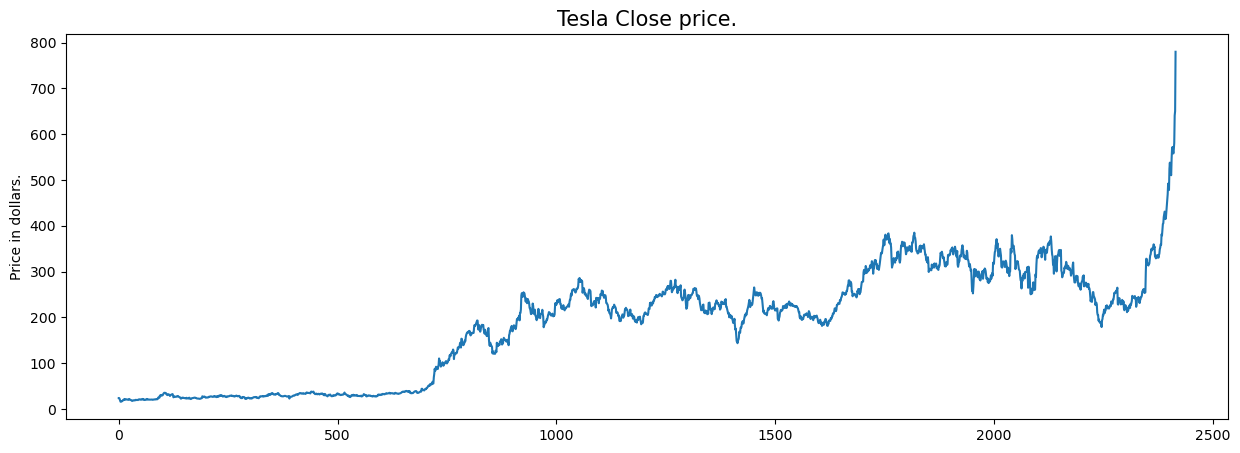

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [9]:
# Check for the null values if any are present in the data frame.
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

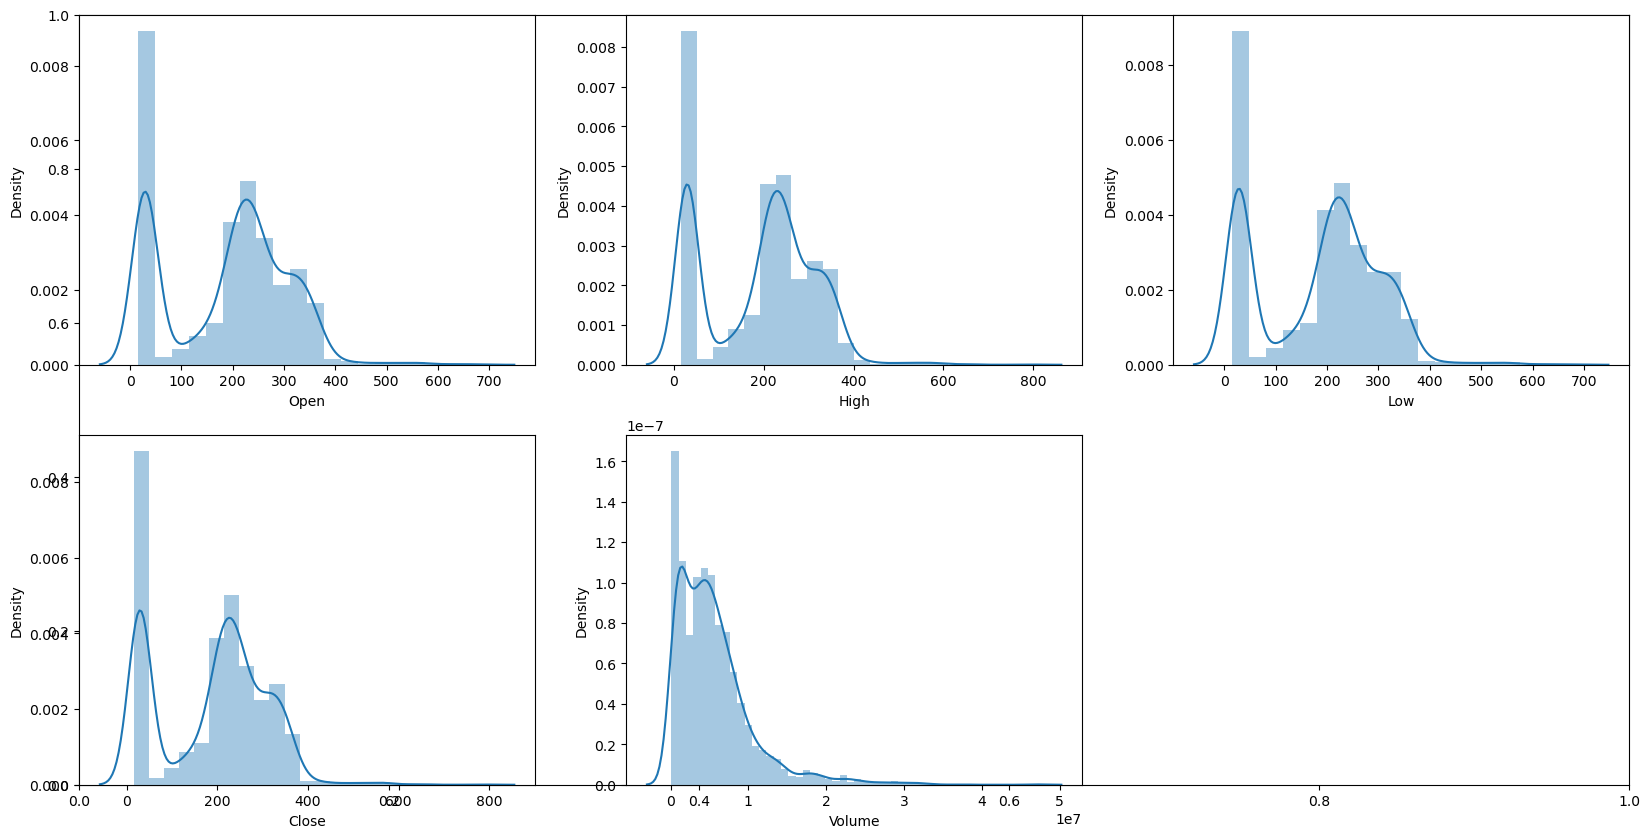

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
# Distribution Plot of OFLC data
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])
plt.show()

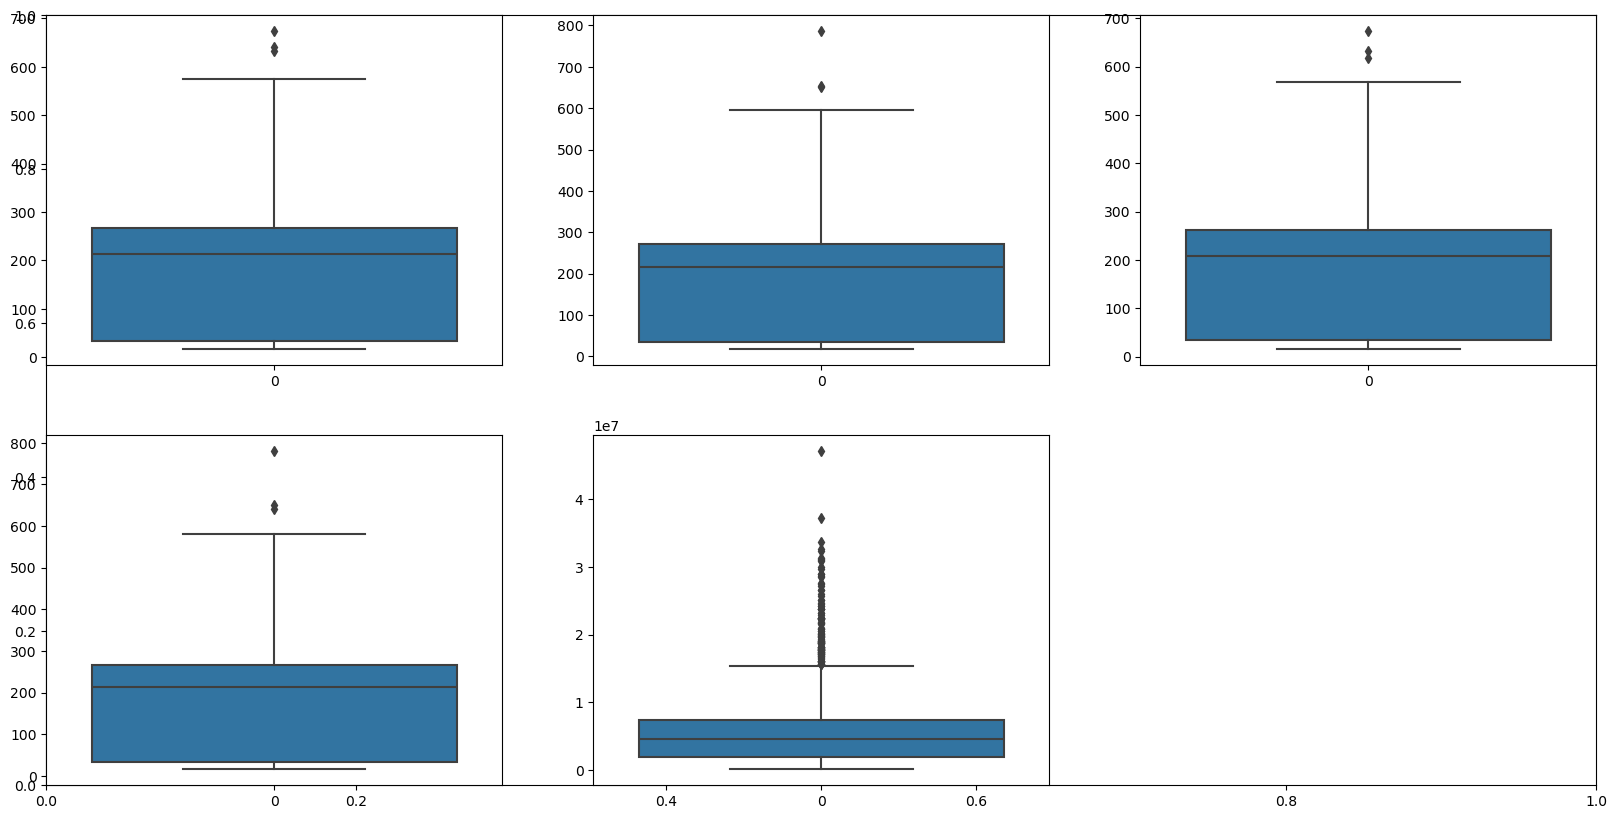

In [11]:
# Box Plot of OFLC data
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

### Feature Engineering
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [12]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

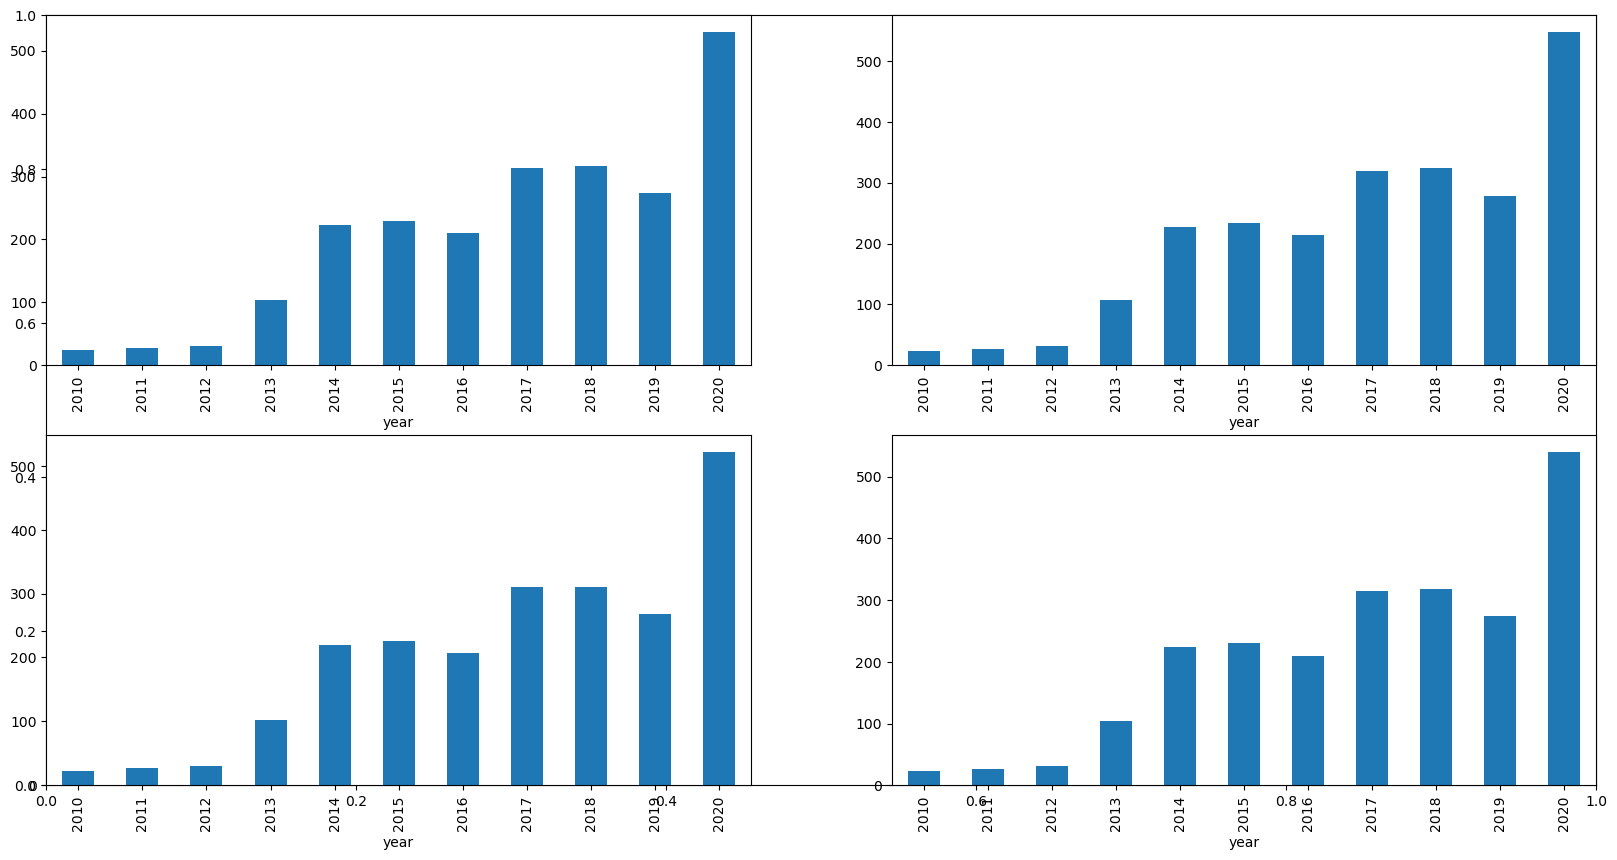

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot(kind='bar')
plt.show()

In [15]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500




Here are some of the important observations of the above-grouped data:

- Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
- The volume of trades is lower in the months which are quarter end.nd.

In [16]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this.

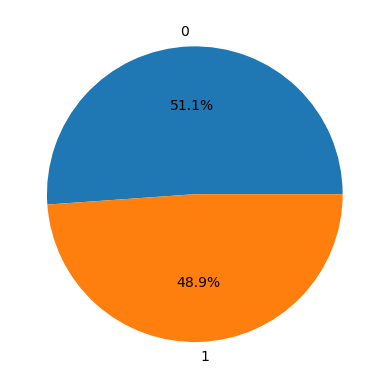

In [17]:
# let’s check whether the target is balanced or not using a pie chart
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

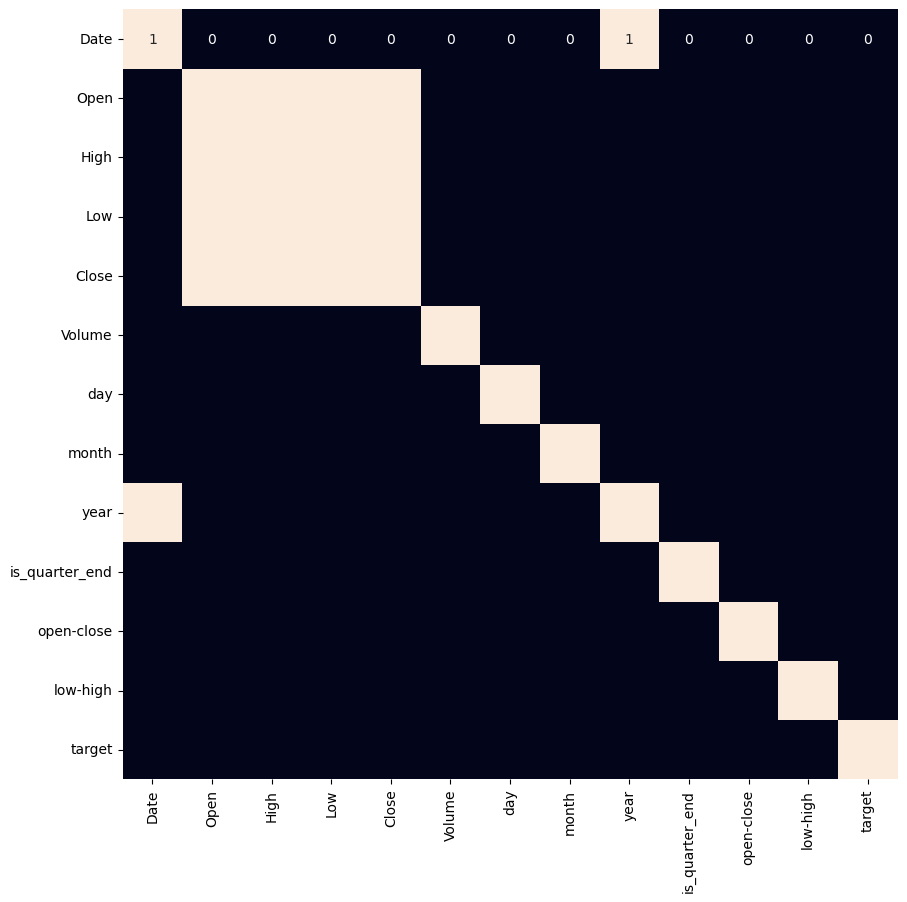

In [18]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

### Data Splitting and Normalization

In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


### Model Developement and Evaluation

To train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [20]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294580830338206
Validation Accuracy :  0.46257525998905313

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

Now let’s plot a confusion matrix for the validation data.

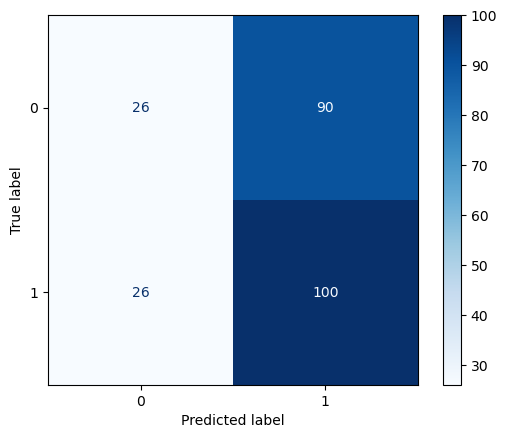

In [21]:

cm = metrics.confusion_matrix(Y_valid, models[0].predict(X_valid))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[0].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

From the given numbers in the confusion matrix, we can conclude the following:
- There are 26 true positives (TP) where the model correctly predicted the positive class.
- There are 90 false positives (FP) where the model incorrectly predicted the positive class.
- There are 26 false negatives (FN) where the model incorrectly predicted the negative class.
- There are 100 true negatives (TN) where the model correctly predicted the negative class.

From these numbers, we can calculate various performance metrics for the model:
- Accuracy: The overall proportion of correct predictions, calculated as (TP + TN) / (TP + TN + FP + FN) = (26 + 100) / (26 + 100 + 90 + 26) = 146 / 242 = 0.6033 or 60.33%.
- Precision: The proportion of correct positive predictions out of all positive predictions, calculated as TP / (TP + FP) = 26 / (26 + 90) = 0.2222 or 22.22%.
- Recall (Sensitivity): The proportion of true positive predictions out of all actual positive instances, calculated as TP / (TP + FN) = 26 / (26 + 26) = 0.5 or 50%.
- Specificity: The proportion of true negative predictions out of all actual negative instances, calculated as TN / (TN + FP) = 100 / (100 + 90) = 0.5263 or 52.63%.
- F1 score: The harmonic mean of precision and recall, calculated as 2 * (precision * recall) / (precision + recall) = 2 * (0.2222 * 0.5) / (0.2222 + 0.5) = 0.3000 or 30%.
'''